
# A partir de los archivos desanidados realizo un EDA y continuo con el ETL



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files


In [3]:
ruta_data = '/content/drive/MyDrive/Projecto Individual MLOPS/PI_ML_OPS-FT/PI MLOps - STEAM/'

importamos librerias que vamos a usar

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

## Cargamos el dataset Diccionario de Datos

In [5]:
ruta_archivo = '/content/drive/MyDrive/Projecto Individual MLOPS/PI_ML_OPS-FT/PI MLOps - STEAM/Diccionario de Datos STEAM.xlsx'

df_dicc = pd.read_excel(ruta_archivo)

In [6]:
df_dicc

,steam_games.gz.json,Unnamed: 1,Unnamed: 2
0,Columna,Descripción,Ejemplo
1,publisher,Empresa publicadora del contenido,"[Ubisoft,Dovetail Games - Trains,Degica]"
2,genres,Genero del contenido,"[Action, Adventure, Racing, Simulation, Strategy]"
3,app_name,Nombre del contenido,"[Warzone, Soundtrack, Puzzle Blocks]"
4,title,Titulo del contenido,"[The Dream Machine: Chapter 4 , Fate/EXTELLA -..."
5,url,URL de publicación del contenido,http://store.steampowered.com/app/761140/Lost_...
6,release_date,Fecha de lanzamiento,[2018-01-04]
7,tags,etiquetas de contenido,"[Simulation, Indie, Action, Adventure, Funny, ..."
8,discount_price,precio de descuento,"[22.66, 0.49, 0.69]"
9,reviews_url,Reviews de contenido,http://steamcommunity.com/app/681550/reviews/?...


este es un dataframe que explica que es cada variable y da un ejemplo de cada dato

# Cargo el archivo reviews desanidado

In [21]:
ruta_archivo = ruta_data + 'reviews_raw.parquet'

# Lee el archivo Parquet en un DataFrame

df_reviews = pd.read_parquet(ruta_archivo)

ruta_archivo = ruta_data + 'steam_raw.parquet'

# Lee el archivo Parquet en un DataFrame

df_steam = pd.read_parquet(ruta_archivo)

ruta_archivo = ruta_data + 'items_raw.parquet'

# Lee el archivo Parquet en un DataFrame

df_items = pd.read_parquet(ruta_archivo)


ruta_archivo = ruta_data + 'reviews_sa.parquet'

# Lee el archivo Parquet en un DataFrame

df_reviews_sa = pd.read_parquet(ruta_archivo)

ruta_archivo = ruta_data + 'steam_exploded.parquet'

genres_counts = pd.read_parquet(ruta_archivo)


In [8]:
df_reviews.head(5)

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59305 non-null  object
 1   user_url     59305 non-null  object
 2   funny        59305 non-null  object
 3   posted       59305 non-null  object
 4   last_edited  59305 non-null  object
 5   item_id      59305 non-null  object
 6   helpful      59305 non-null  object
 7   recommend    59305 non-null  bool  
 8   review       59305 non-null  object
dtypes: bool(1), object(8)
memory usage: 3.7+ MB


Por ahora no voy a pasar a dato numerico la columna item_id

No hay datos nulos en este dataframe

Las columnas user_id , item_id serviran de coneccion con los otros dataframes

## Creamos una nube de palabras con la columna review , para ver cuales son las palabras mas repetidas

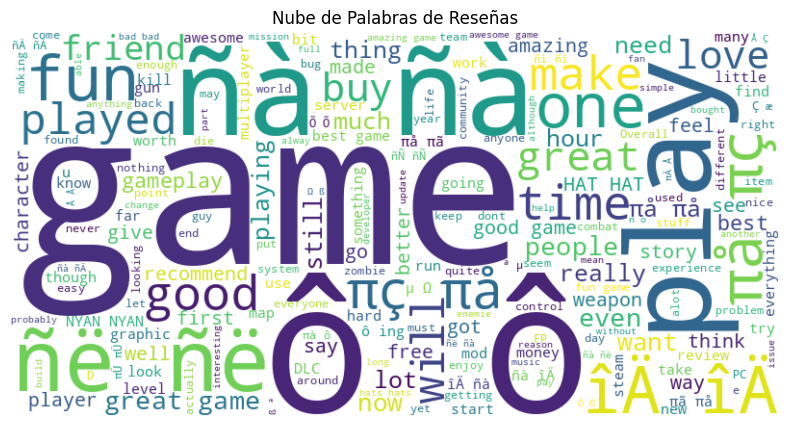

In [10]:
# Concatena todas las reseñas en un solo texto
texto = ' '.join(df_reviews['review'])

# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Muestra la nube de palabras en un gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de Reseñas")
plt.show()

Este histograma mostrará la distribución de revisiones recomendadas y no recomendadas.

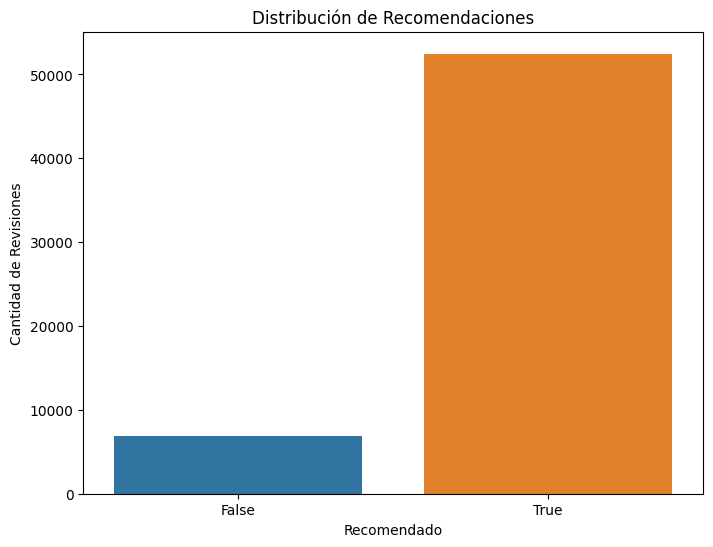

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot de recomendaciones
plt.figure(figsize=(8, 6))
sns.countplot(data=df_reviews, x='recommend')
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendado')
plt.ylabel('Cantidad de Revisiones')
plt.show()


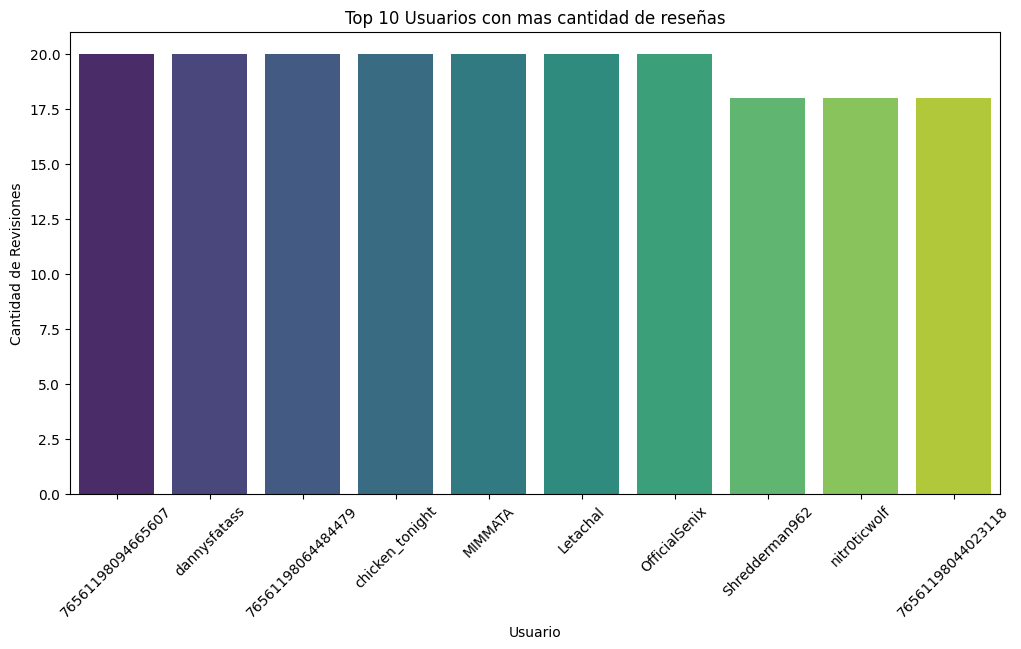

In [12]:
# Contar el número de revisiones por usuario y obtener los N usuarios más activos
top_n_users = 10
active_users = df_reviews['user_id'].value_counts().head(top_n_users)

# Gráfico de barras de usuarios más activos
plt.figure(figsize=(12, 6))
sns.barplot(x=active_users.index, y=active_users.values, palette='viridis')
plt.title(f'Top {top_n_users} Usuarios con mas cantidad de reseñas')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Revisiones')
plt.xticks(rotation=45)
plt.show()


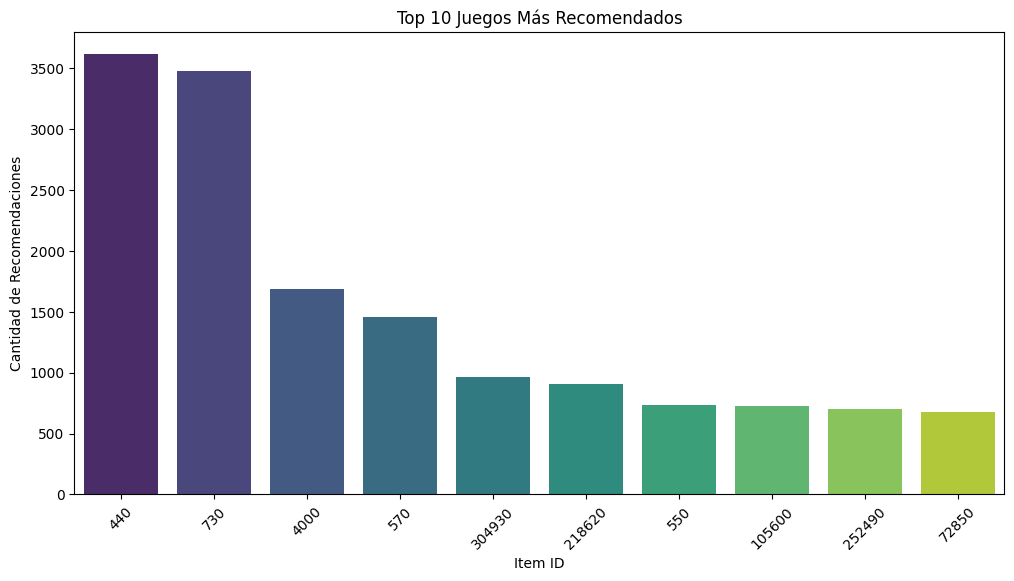

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de veces que cada elemento ha sido recomendado
top_items = df_reviews[df_reviews['recommend'] == True]['item_id'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')
plt.title('Top 10 Juegos Más Recomendados')
plt.xlabel('Item ID')
plt.ylabel('Cantidad de Recomendaciones')
plt.xticks(rotation=45)
plt.show()


## Carga del archivo steam_games desanidado

In [22]:
columnas_comunes_1 = df_reviews.columns.intersection(df_steam.columns)
print(columnas_comunes_1)


Index(['user_id', 'item_id'], dtype='object')


Vemos que user_id será la columna que conecte

In [23]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   reviews_url     32133 non-null  object 
 8   discount_price  225 non-null    float64
 9   specs           31465 non-null  object 
 10  price           28848 non-null  float64
 11  early_access    32135 non-null  object 
 12  item_id         32133 non-null  object 
 13  metascore       2607 non-null   float64
 14  developer       28836 non-null  object 
 15  user_id         88310 non-null  object 
 16  steam_id        88310 non-null  object 
 17  items           88310 non-nul

en este dataset si hay varios valores nulos , bastantes , mas adelante veremos que accion es la conveniente



In [24]:
df_steam.head(3)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,item_id,metascore,developer,user_id,steam_id,items,items_count
0,None,None,None,None,None,None,None,None,NaN,None,NaN,None,None,NaN,None,76561197970982479,76561197970982479,"[{'item_id': '10', 'item_name': 'Counter-Strik...",277.0
1,None,None,None,None,None,None,None,None,NaN,None,NaN,None,None,NaN,None,js41637,76561198035864385,"[{'item_id': '10', 'item_name': 'Counter-Strik...",888.0
2,None,None,None,None,None,None,None,None,NaN,None,NaN,None,None,NaN,None,evcentric,76561198007712555,"[{'item_id': '1200', 'item_name': 'Red Orchest...",137.0


In [25]:
df_steam.tail(3)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,item_id,metascore,developer,user_id,steam_id,items,items_count
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich,None,None,None,NaN
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,NaN,"xropi,stev3ns",None,None,None,NaN
120444,None,None,Maze Run VR,None,http://store.steampowered.com/app/681550/Maze_...,None,"[Early Access, Adventure, Indie, Action, Simul...",http://steamcommunity.com/app/681550/reviews/?...,NaN,"[Single-player, Stats, Steam Leaderboards, HTC...",4.99,True,681550,NaN,None,None,None,None,NaN


## Visualizamos como varia la frecuencia de compra en funcion del precio

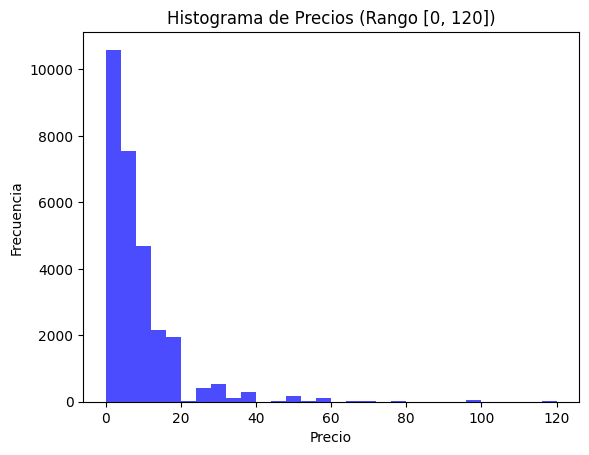

In [26]:

# Filtra los valores no nulos en la columna "price" y limita al rango [0, 350]
precios = df_steam['price'].dropna()
precios_limitados = precios[(precios >= 0) & (precios <= 120)]

# Crea el histograma
plt.hist(precios_limitados, bins=30, color='blue', alpha=0.7, range=[0, 120])
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios (Rango [0, 120])')
plt.show()



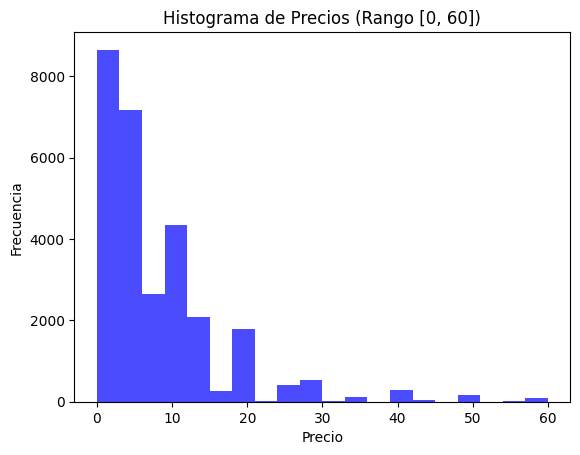

In [27]:
# Filtra los valores no nulos en la columna "price" y limita al rango [0, 350]
precios = df_steam['price'].dropna()
precios_limitados = precios[(precios >= 0) & (precios <= 60)]

# Crea el histograma
plt.hist(precios_limitados, bins=20, color='blue', alpha=0.7, range=[0, 60])
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios (Rango [0, 60])')
plt.show()

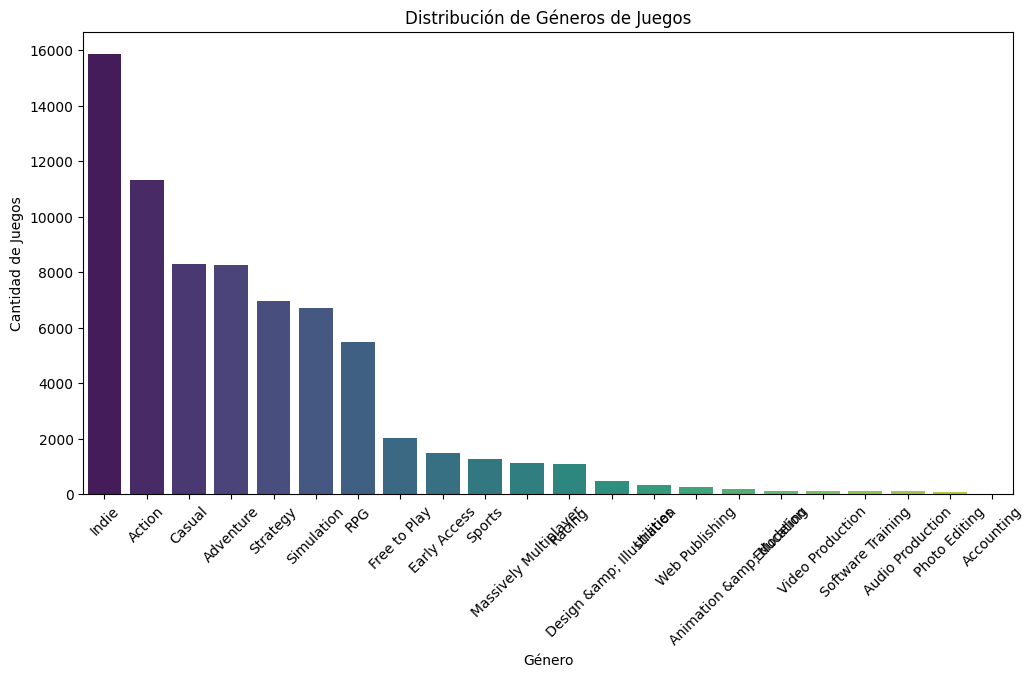

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de juegos en cada género
genre_counts = df_steam['genres'].explode().value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribución de Géneros de Juegos')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()


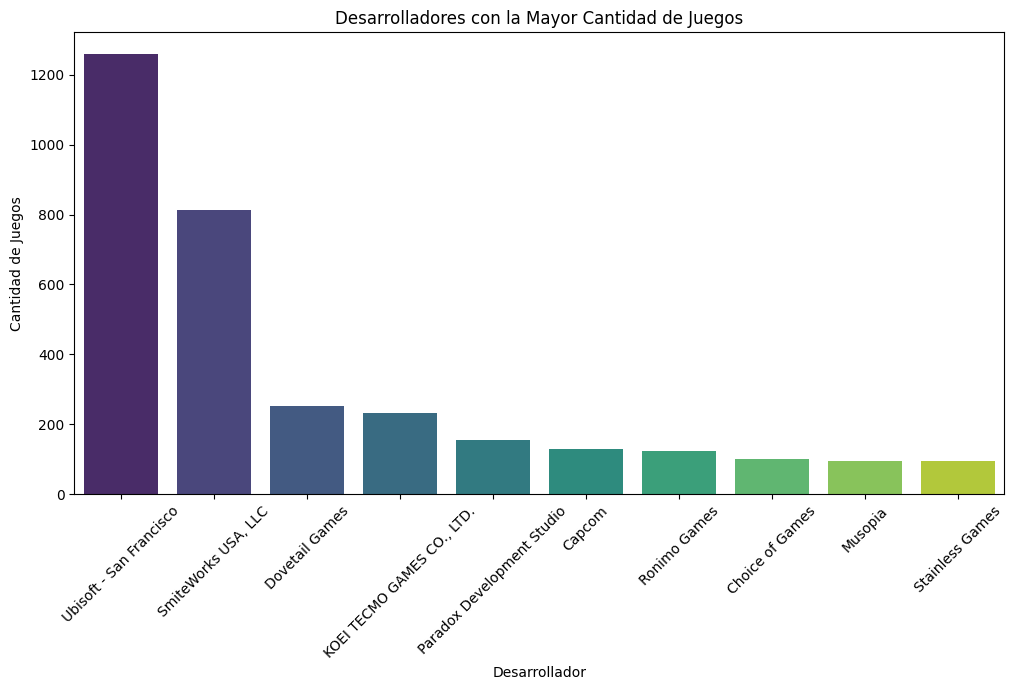

In [30]:
# Contar la cantidad de juegos por desarrollador
developer_counts = df_steam['developer'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=developer_counts.index, y=developer_counts.values, palette='viridis')
plt.title('Desarrolladores con la Mayor Cantidad de Juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()


# Cargamos el dataset items

In [31]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285246 entries, 0 to 3285245
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   steam_id          object
 3   user_url          object
 4   item_id           object
 5   item_name         object
 6   playtime_forever  int64 
 7   playtime_2weeks   int64 
dtypes: int64(3), object(5)
memory usage: 200.5+ MB


In [32]:
df_items.head()

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,Counter-Strike,6,0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,3,Day of Defeat,7,0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,3,Day of Defeat: Source,4733,0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2,Counter-Strike: Source,1853,0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,3,Psychonauts,333,0


### Cantidad de nulos por columna

In [ ]:
nulos_por_columna = df_items.isnull().sum()
print(nulos_por_columna)


no hay datos nulos


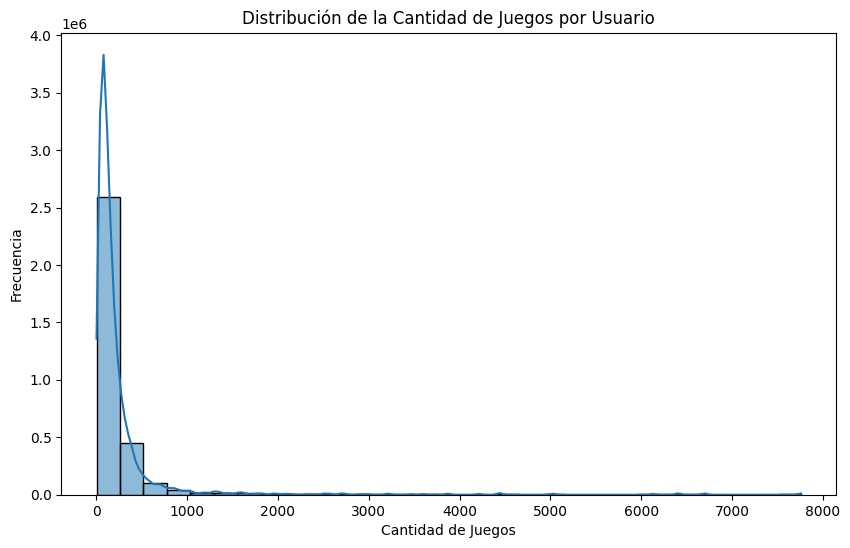

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un histograma de la cantidad de juegos por usuario
plt.figure(figsize=(10, 6))
sns.histplot(data=df_items, x='items_count', bins=30, kde=True )
plt.title('Distribución de la Cantidad de Juegos por Usuario')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Frecuencia')
plt.show()


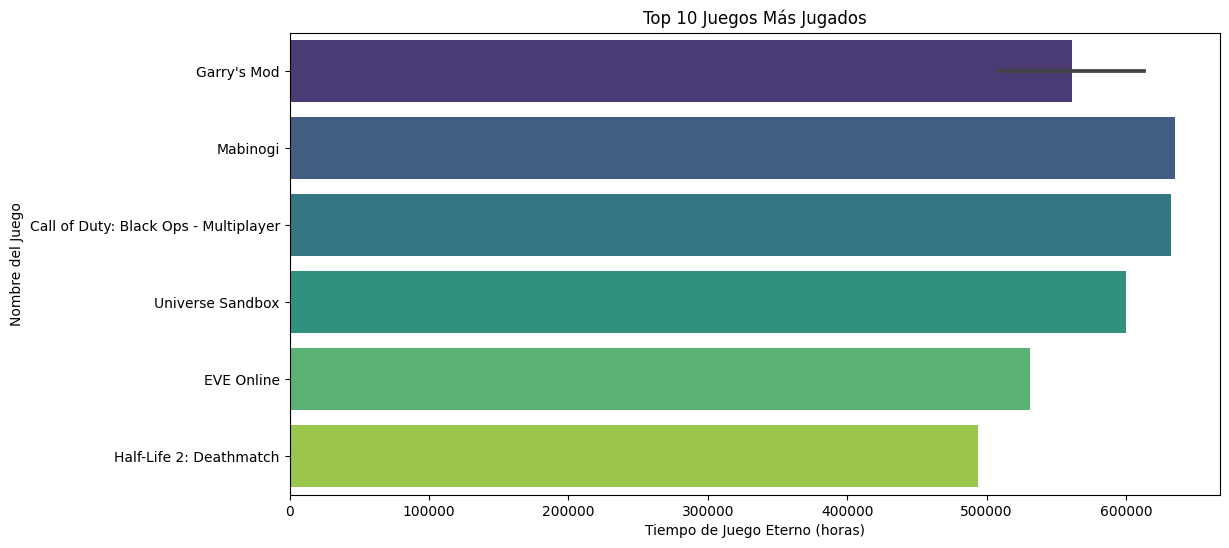

In [41]:
# Obtener los 10 juegos más jugados
top_10_played_games = df_items.nlargest(10, 'playtime_forever')

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_played_games, x='playtime_forever', y='item_name', palette='viridis')
plt.title('Top 10 Juegos Más Jugados')
plt.xlabel('Tiempo de Juego Eterno (horas)')
plt.ylabel('Nombre del Juego')
plt.show()


## vemos cuales son las columnas en comun con los otros 2 datasets

In [42]:
columnas_comunes_2 = df_items.columns.intersection(df_reviews.columns)
print('Columnas en comun entre items  y reviews', columnas_comunes_2)

columnas_comunes_3 = df_items.columns.intersection(df_steam.columns)
print('Columnas en comun entre items  y steam',columnas_comunes_3)

Columnas en comun entre items  y reviews Index(['user_id', 'user_url', 'item_id'], dtype='object')
Columnas en comun entre items  y steam Index(['user_id', 'items_count', 'steam_id', 'item_id'], dtype='object')


## Visualizamos con una nubre de palabras los juegos mas comprados

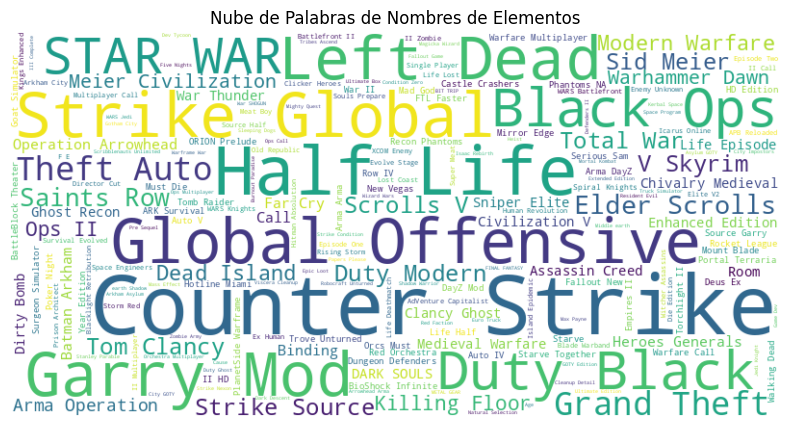

In [43]:
# Concatena todos los nombres de los elementos en un solo texto
texto = ' '.join(df_items['item_name'])

# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Muestra la nube de palabras en un gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de Nombres de Elementos')
plt.show()


## Visualizamos las variables numericas

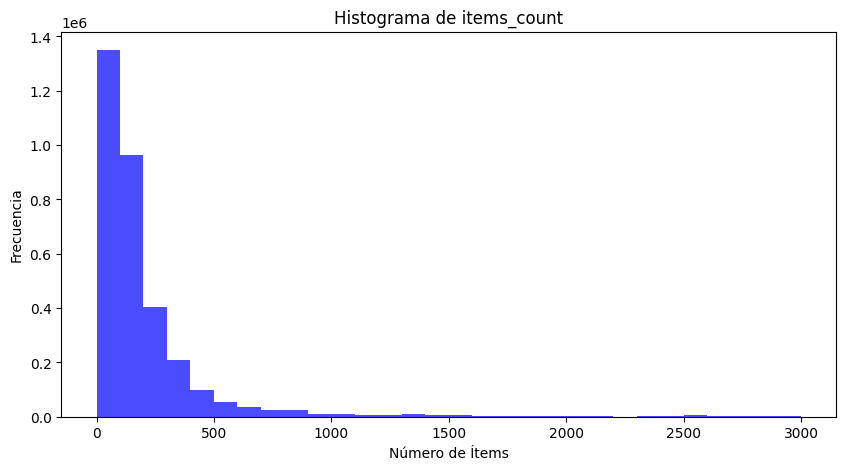

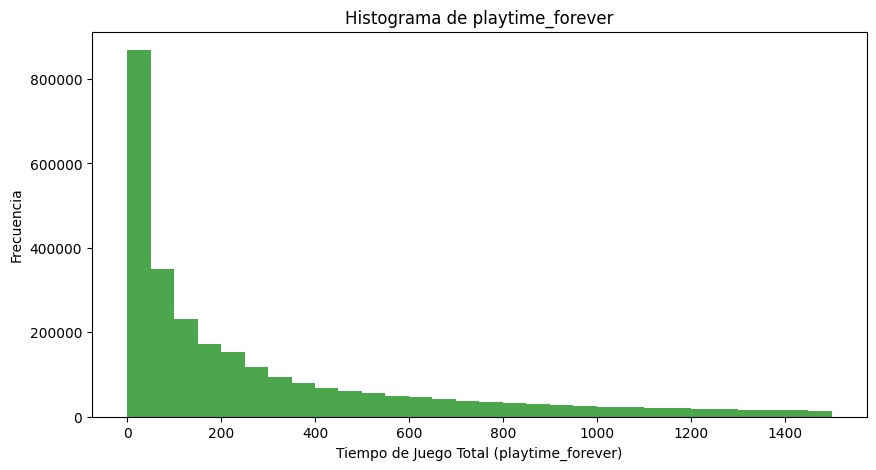

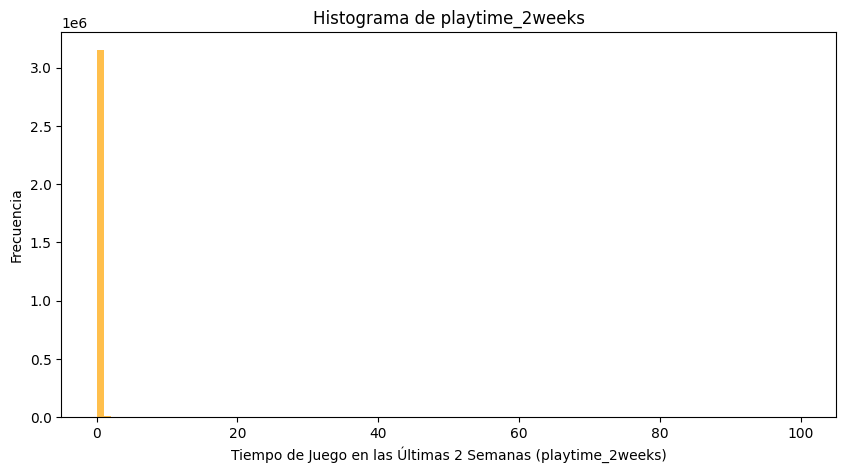

In [44]:
import matplotlib.pyplot as plt

# Histograma para la variable "items_count"
plt.figure(figsize=(10, 5))
plt.hist(df_items['items_count'], bins=30, color='blue', alpha=0.7, range=[0, 3000])
plt.xlabel('Número de Ítems')
plt.ylabel('Frecuencia')
plt.title('Histograma de items_count')
plt.show()

# Histograma para la variable "playtime_forever"
plt.figure(figsize=(10, 5))
plt.hist(df_items['playtime_forever'], bins=30, color='green', alpha=0.7, range=[0, 1500])
plt.xlabel('Tiempo de Juego Total (playtime_forever)')
plt.ylabel('Frecuencia')
plt.title('Histograma de playtime_forever')
plt.show()

# Histograma para la variable "playtime_2weeks"
plt.figure(figsize=(10, 5))
plt.hist(df_items['playtime_2weeks'], bins=100, color='orange', alpha=0.7, range=[0, 100])
plt.xlabel('Tiempo de Juego en las Últimas 2 Semanas (playtime_2weeks)')
plt.ylabel('Frecuencia')
plt.title('Histograma de playtime_2weeks')
plt.show()


#### Visualizamos el dataset que contiene el sentiment analysis

In [45]:
df_reviews_sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48498 entries, 0 to 59276
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             48498 non-null  object
 1   posted              48498 non-null  object
 2   item_id             48498 non-null  object
 3   recommend           48498 non-null  bool  
 4   sentiment_analysis  48498 non-null  int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 1.9+ MB


In [47]:
df_reviews_sa.head(10)

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,05-11-2011,1250,True,2
1,76561197970982479,15-07-2011,22200,True,2
2,76561197970982479,21-04-2011,43110,True,2
3,js41637,24-06-2014,251610,True,2
4,js41637,08-09-2013,227300,True,2
5,js41637,29-11-2013,239030,True,2
7,evcentric,04-12-2015,370360,True,2
8,evcentric,03-11-2014,237930,True,2
9,evcentric,15-10-2014,263360,True,1
10,evcentric,15-10-2014,107200,True,2


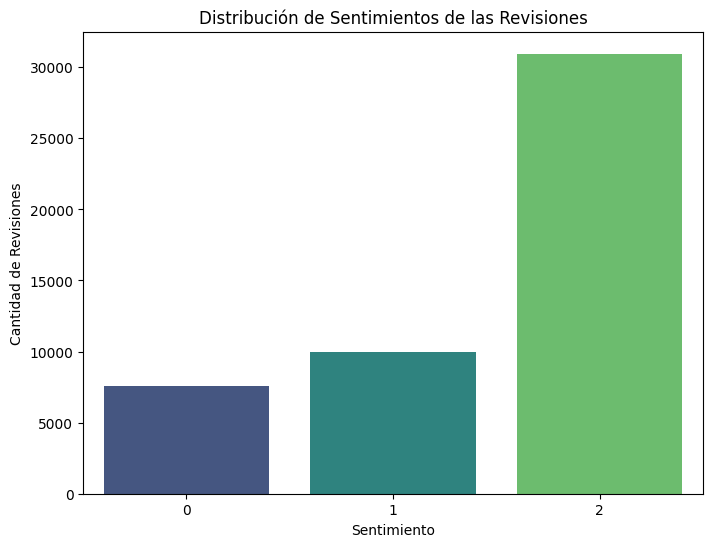

In [49]:
# Contar la cantidad de revisiones con diferentes sentimientos
sentiment_counts = df_reviews_sa['sentiment_analysis'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribución de Sentimientos de las Revisiones')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Revisiones')
plt.show()


### 0 : Negative , 1 : Neutral , 2 : Positive

#### Algunas visualizacion con los datasets finales

In [53]:
ruta_archivo = ruta_data + 'reviews.parquet'

# Lee el archivo Parquet en un DataFrame

df_reviews = pd.read_parquet(ruta_archivo)

ruta_archivo = ruta_data + 'steam_games.parquet'

# Lee el archivo Parquet en un DataFrame

df_steam = pd.read_parquet(ruta_archivo)

ruta_archivo = ruta_data + 'items.parquet'

# Lee el archivo Parquet en un DataFrame

df_items = pd.read_parquet(ruta_archivo)


ruta_archivo = ruta_data + 'reviews_sa.parquet'

# Lee el archivo Parquet en un DataFrame

df_reviews_sa = pd.read_parquet(ruta_archivo)

ruta_archivo = ruta_data + 'steam_exploded.parquet'

genres_counts = pd.read_parquet(ruta_archivo)


In [54]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48498 entries, 0 to 59276
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    48498 non-null  object
 1   posted     48498 non-null  object
 2   item_id    48498 non-null  object
 3   recommend  48498 non-null  bool  
 4   review     48498 non-null  object
dtypes: bool(1), object(4)
memory usage: 1.9+ MB


In [55]:
df_reviews.head()

,user_id,posted,item_id,recommend,review
0,76561197970982479,05-11-2011,1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,15-07-2011,22200,True,It's unique and worth a playthrough.
2,76561197970982479,21-04-2011,43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,24-06-2014,251610,True,I know what you think when you see this title ...
4,js41637,08-09-2013,227300,True,For a simple (it's actually not all that simpl...


In [56]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28832 entries, 88310 to 120443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28832 non-null  object
 1   item_name     28831 non-null  object
 2   release_date  28832 non-null  object
 3   item_id       28832 non-null  object
 4   user_id       28832 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [57]:
df_steam.head()

,genres,item_name,release_date,item_id,user_id
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,761140,nan
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,643980,nan
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,670290,nan
88313,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,767400,nan
88315,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,772540,nan


In [58]:
genres_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71498 entries, 88310 to 120443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        71498 non-null  object
 1   item_name     71496 non-null  object
 2   release_date  71498 non-null  object
 3   item_id       71498 non-null  object
 4   user_id       71498 non-null  object
dtypes: object(5)
memory usage: 3.3+ MB


In [59]:
genres_counts.head()

,genres,item_name,release_date,item_id,user_id
88310,Action,Lost Summoner Kitty,2018-01-04,761140,nan
88310,Casual,Lost Summoner Kitty,2018-01-04,761140,nan
88310,Indie,Lost Summoner Kitty,2018-01-04,761140,nan
88310,Simulation,Lost Summoner Kitty,2018-01-04,761140,nan
88310,Strategy,Lost Summoner Kitty,2018-01-04,761140,nan


In [61]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3246337 entries, 0 to 3285245
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           object
 2   item_name         object
 3   playtime_forever  int64 
dtypes: int64(1), object(3)
memory usage: 123.8+ MB


In [60]:
df_items.head()

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,1,Counter-Strike,6
1,76561197970982479,3,Day of Defeat,7
2,76561197970982479,3,Day of Defeat: Source,4733
3,76561197970982479,2,Counter-Strike: Source,1853
4,76561197970982479,3,Psychonauts,333


In [63]:
df_reviews_sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48498 entries, 0 to 59276
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             48498 non-null  object
 1   posted              48498 non-null  object
 2   item_id             48498 non-null  object
 3   recommend           48498 non-null  bool  
 4   sentiment_analysis  48498 non-null  int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 1.9+ MB


In [64]:
df_reviews.head()

,user_id,posted,item_id,recommend,review
0,76561197970982479,05-11-2011,1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,15-07-2011,22200,True,It's unique and worth a playthrough.
2,76561197970982479,21-04-2011,43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,24-06-2014,251610,True,I know what you think when you see this title ...
4,js41637,08-09-2013,227300,True,For a simple (it's actually not all that simpl...


In [65]:
# Estadísticas descriptivas de los DataFrames numéricos
print(df_items.describe())
print(df_reviews_sa.describe())

       playtime_forever
count      3.246337e+06
mean       1.554297e+03
std        6.717179e+03
min        1.000000e+00
25%        4.400000e+01
50%        2.050000e+02
75%        8.080000e+02
max        6.427730e+05
       sentiment_analysis
count        48498.000000
mean             1.482102
std              0.749579
min              0.000000
25%              1.000000
50%              2.000000
75%              2.000000
max              2.000000


Identifica los "top items" con más recomendaciones

In [67]:
top_recommended_items = df_reviews[df_reviews['recommend'] == True].groupby('item_id')['recommend'].count().reset_index()
top_recommended_items = top_recommended_items.rename(columns={'recommend': 'recommend_count'})
top_recommended_items = top_recommended_items.sort_values(by='recommend_count', ascending=False)



Identifica los "top items" con sentimientos negativos (sentiment_analysis == 0) y positivos (sentiment_analysis == 2)

In [68]:
top_negative_items = df_reviews_sa[df_reviews_sa['sentiment_analysis'] == 0].groupby('item_id')['sentiment_analysis'].count().reset_index()
top_negative_items = top_negative_items.rename(columns={'sentiment_analysis': 'negative_count'})

top_positive_items = df_reviews_sa[df_reviews_sa['sentiment_analysis'] == 2].groupby('item_id')['sentiment_analysis'].count().reset_index()
top_positive_items = top_positive_items.rename(columns={'sentiment_analysis': 'positive_count'})


Mezcla los resultados con los nombres de los elementos:
Ahora, puedes combinar los DataFrames anteriores con el DataFrame df_steam para obtener los nombres de los elementos correspondientes.

In [69]:
top_recommended_items_with_names = pd.merge(top_recommended_items, df_steam[['item_id', 'item_name']], on='item_id', how='inner')
top_negative_items_with_names = pd.merge(top_negative_items, df_steam[['item_id', 'item_name']], on='item_id', how='inner')
top_positive_items_with_names = pd.merge(top_positive_items, df_steam[['item_id', 'item_name']], on='item_id', how='inner')


Gráfico de barras para los "top items" con más recomendaciones

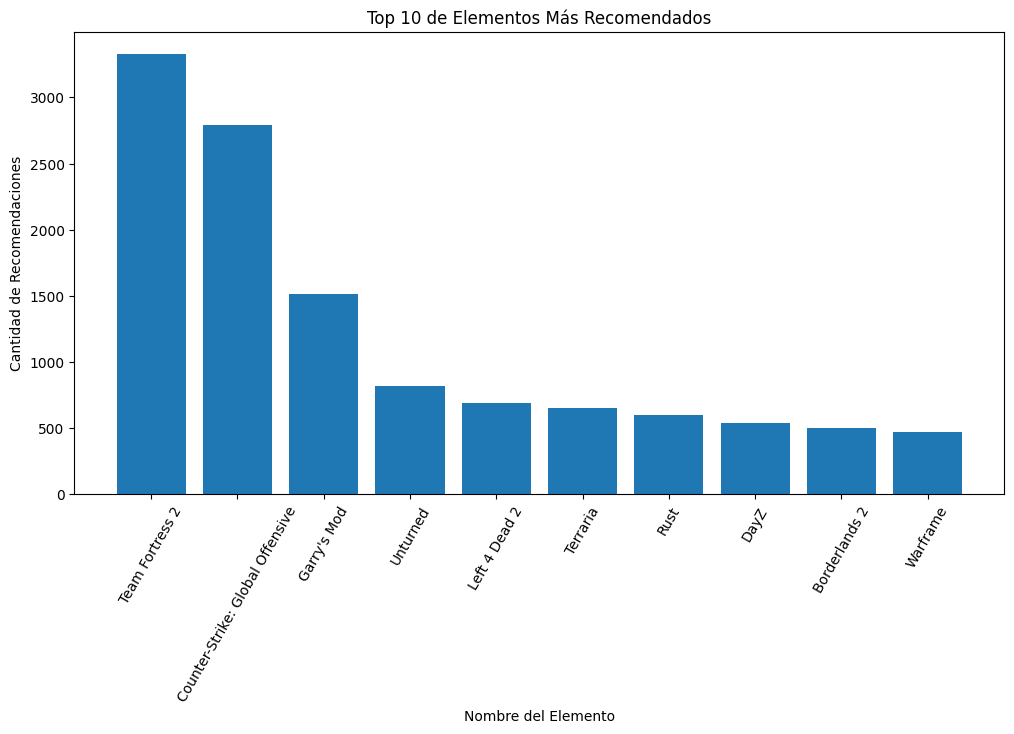

In [73]:
plt.figure(figsize=(12, 6))
plt.bar(top_recommended_items_with_names['item_name'][:10], top_recommended_items_with_names['recommend_count'][:10])
plt.xlabel('Nombre del Elemento')
plt.ylabel('Cantidad de Recomendaciones')
plt.title('Top 10 de Elementos Más Recomendados')
plt.xticks(rotation=60)
plt.show()


Gráfico de barras para los "top items" con sentimientos negativos:

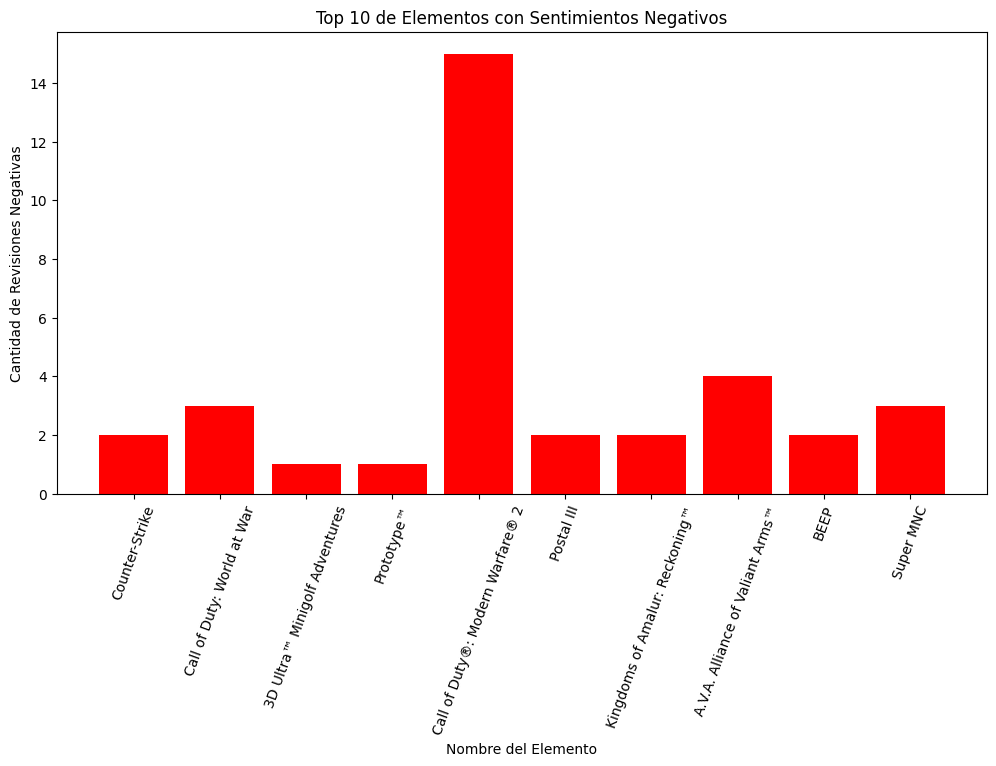

In [74]:
plt.figure(figsize=(12, 6))
plt.bar(top_negative_items_with_names['item_name'][:10], top_negative_items_with_names['negative_count'][:10], color='red')
plt.xlabel('Nombre del Elemento')
plt.ylabel('Cantidad de Revisiones Negativas')
plt.title('Top 10 de Elementos con Sentimientos Negativos')
plt.xticks(rotation=70)
plt.show()


#### Nubes de palabras de juegos mas comprados con el dataset limpo

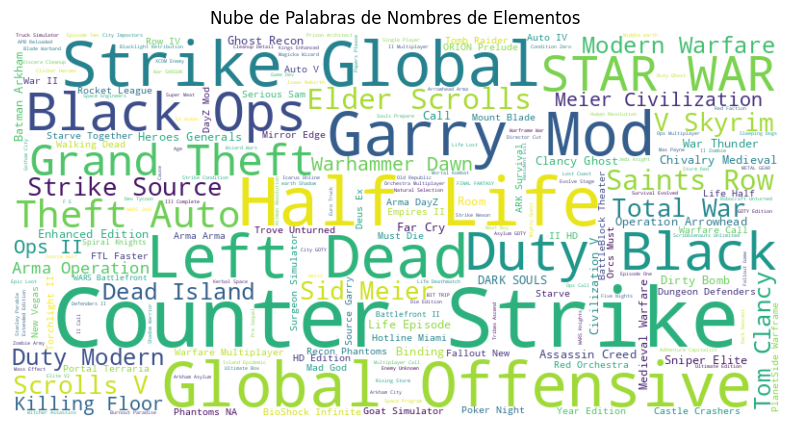

In [75]:
# Concatena todos los nombres de los elementos en un solo texto
texto = ' '.join(df_items['item_name'])

# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Muestra la nube de palabras en un gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de Nombres de Elementos')
plt.show()